## CONVOLUTIONAL NEURAL NETWORK FRUITS

### Abstract:

In questo progetto è stata realizzata una rete neurale convoluzionale CNN da zero per risolvere un problema di classificazione dei vari tipi di frutta e verdura dal dataset Fruits-360 di Kaggle.
Il dataset contiene 206 diverse tipologie di frutta e verdura, contenente immagini da diverse angolazioni su sfondo bianco.
La rete CNN è stata sviluppata con un architettura con diversi strati di layer Convolution2D,ognuno con un numero di filtri sempre maggiore per rilevare dettagli sempre più precisi,sono stati ultimati usando tecniche di padding e maxpooling,successivamente è stato usato uno strato dense, un livello di dropout per evitare l'overfitting durante l' addestramento ed infine un  layer dense per le predizioni.
Il modello prodotto è un' alternativa ai classici modelli utilizzati per questa tipologia di dataset, riportando alti livelli di precisione, come un accuratezza del 97% sul dataset di validazione.

### CNN STRUCTURE:

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

n=10 #number of epochs
datatrain="data/Training"
datatest="data/Test"
img=(100,100)
batches=30 #number of baches of training dataset
tf.keras.utils.set_random_seed(10) #set seed value for reproducibility
    
train_dataset = tf.keras.utils.image_dataset_from_directory(
    datatrain,
    label_mode='categorical',
    image_size=img,
    batch_size=batches
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    datatest,
    label_mode='categorical',
    image_size=img,
    batch_size=batches
)

model = tf.keras.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(100,100,3)),
tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=64, activation='relu'),
tf.keras.layers.Dropout(0.1), 
tf.keras.layers.Dense(units=206, activation='softmax')
])
    



Found 103993 files belonging to 206 classes.
Found 34711 files belonging to 206 classes.


In [42]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [43]:
history=model.fit(
    train_dataset,
    epochs=n,
    validation_data=test_dataset
)

Epoch 1/10
3467/3467 [==============================] - 519s 148ms/step - loss: 1.0621 - accuracy: 0.7115 - val_loss: 0.3012 - val_accuracy: 0.9286
Epoch 2/10
3467/3467 [==============================] - 469s 135ms/step - loss: 0.3080 - accuracy: 0.8986 - val_loss: 0.2421 - val_accuracy: 0.9428
Epoch 3/10
3467/3467 [==============================] - 468s 135ms/step - loss: 0.2182 - accuracy: 0.9285 - val_loss: 0.1875 - val_accuracy: 0.9591
Epoch 4/10
3467/3467 [==============================] - 436s 126ms/step - loss: 0.1636 - accuracy: 0.9470 - val_loss: 0.1751 - val_accuracy: 0.9601
Epoch 5/10
3467/3467 [==============================] - 425s 122ms/step - loss: 0.1298 - accuracy: 0.9573 - val_loss: 0.1810 - val_accuracy: 0.9659
Epoch 6/10
3467/3467 [==============================] - 434s 125ms/step - loss: 0.1091 - accuracy: 0.9649 - val_loss: 0.1608 - val_accuracy: 0.9687
Epoch 7/10
3467/3467 [==============================] - 447s 129ms/step - loss: 0.0898 - accuracy: 0.9706 - val_

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 64)       

### PERFORMANCE GRAPHS:

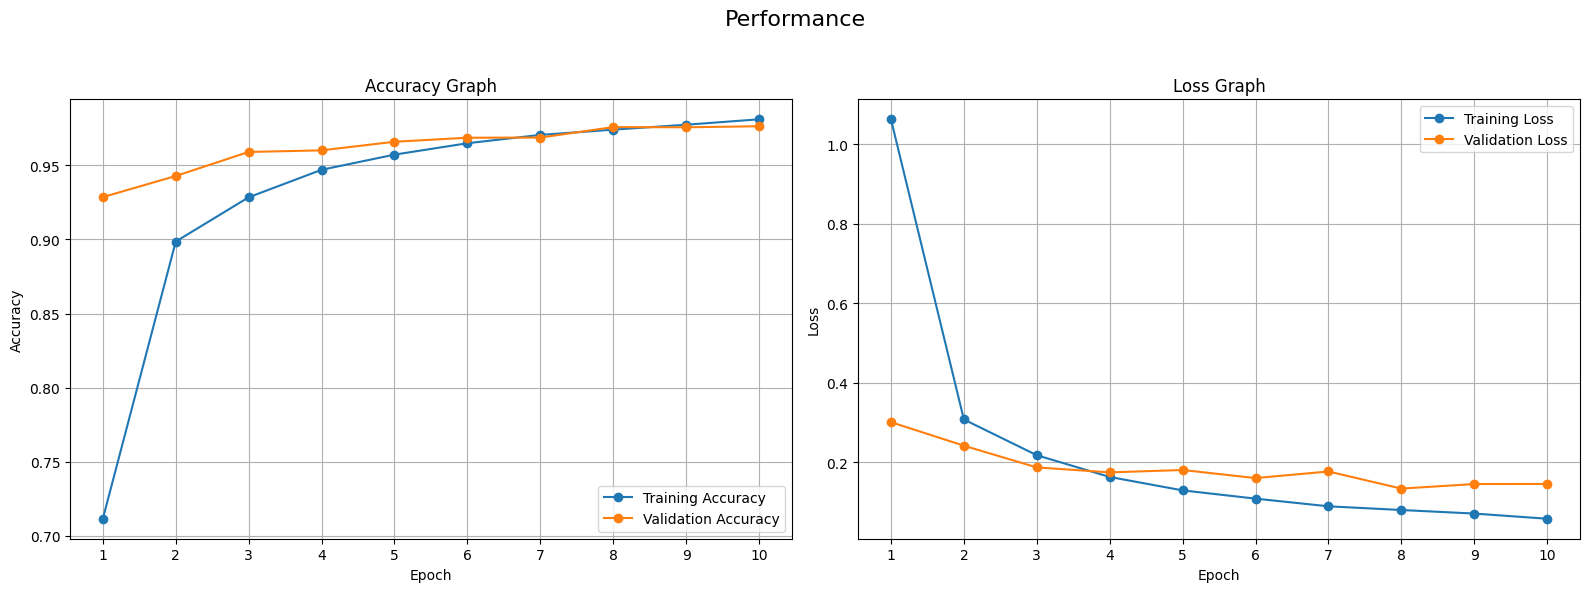

In [45]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_labels=[]
for i in range(n):
    epochs_labels.append(i+1)

#Accuracy Graph
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.xticks(ticks=range(n),labels=epochs_labels)
plt.plot(range(n),acc,'o-',label='Training Accuracy')
plt.plot(range(n),val_acc,'o-',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

#Loss Graph
plt.subplot(1,2,2)
plt.xticks(ticks=range(n),labels=epochs_labels)
plt.plot(range(n),loss,'o-',label='Training Loss')
plt.plot(range(n),val_loss,'o-',label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.suptitle('Performance',fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()




### CHANGE OF LEARNING RATE

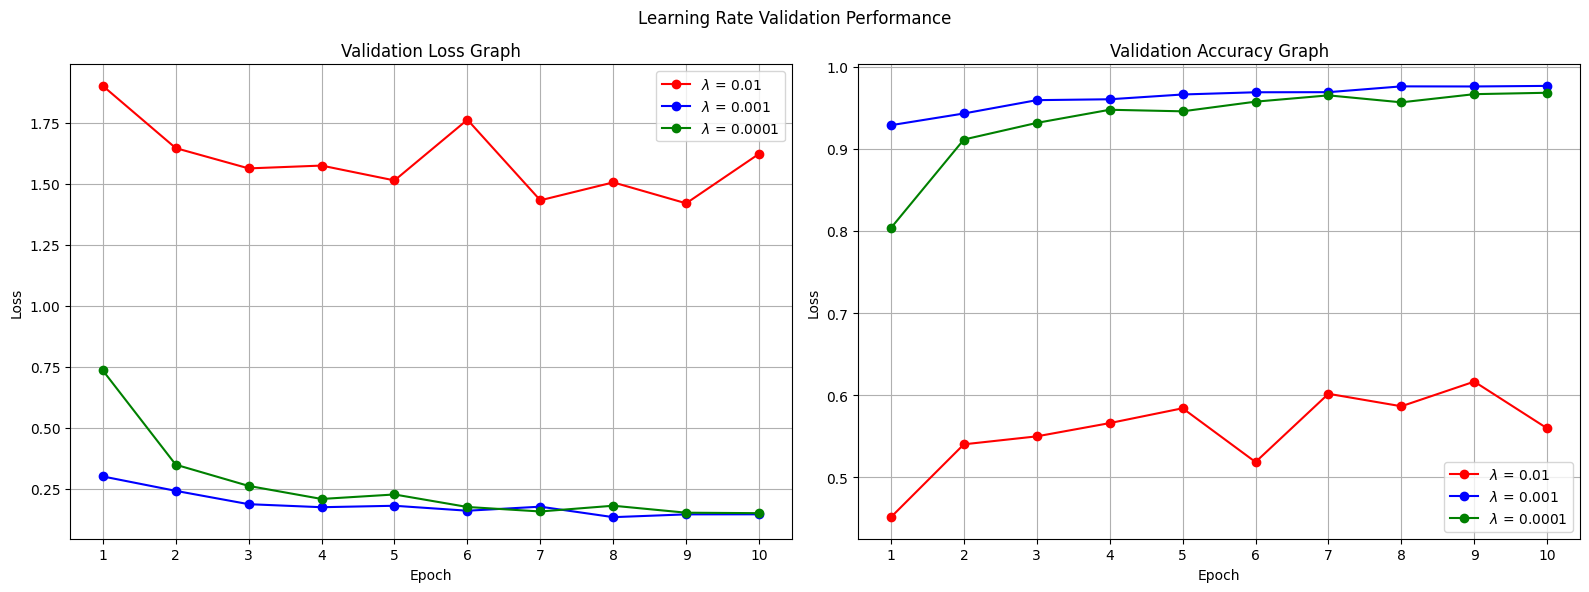

In [46]:
datahigh=np.loadtxt("lr_high.dat")
datalow=np.loadtxt("lr_low.dat")
loss_low=datalow[:,2]
loss_high=datahigh[:,2]
acc_low=datalow[:,3]
acc_high=datahigh[:,3]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Validation Loss Graph')
plt.xticks(ticks=range(1,n+1)) 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1,n+1),loss_high,"o-",label="$\lambda$ = 0.01",color="red")
plt.plot(range(1,n+1),val_loss,"o-",label="$\lambda$ = 0.001",color="blue")
plt.plot(range(1,n+1),loss_low,"o-",label="$\lambda$ = 0.0001",color="green")
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title("Validation Accuracy Graph")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(ticks=range(1,n+1)) 
plt.plot(range(1,n+1),acc_high,"o-",label="$\lambda$ = 0.01",color="red")
plt.plot(range(1,n+1),val_acc,"o-",label="$\lambda$ = 0.001",color="blue")
plt.plot(range(1,n+1),acc_low,"o-",label="$\lambda$ = 0.0001",color="green")
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout(rect=[0,0,1,0.95])
plt.suptitle("Learning Rate Validation Performance")


plt.show()

### CHANGE OF DROPOUT

Text(0.5, 0.98, 'DropOut Validation Performance')

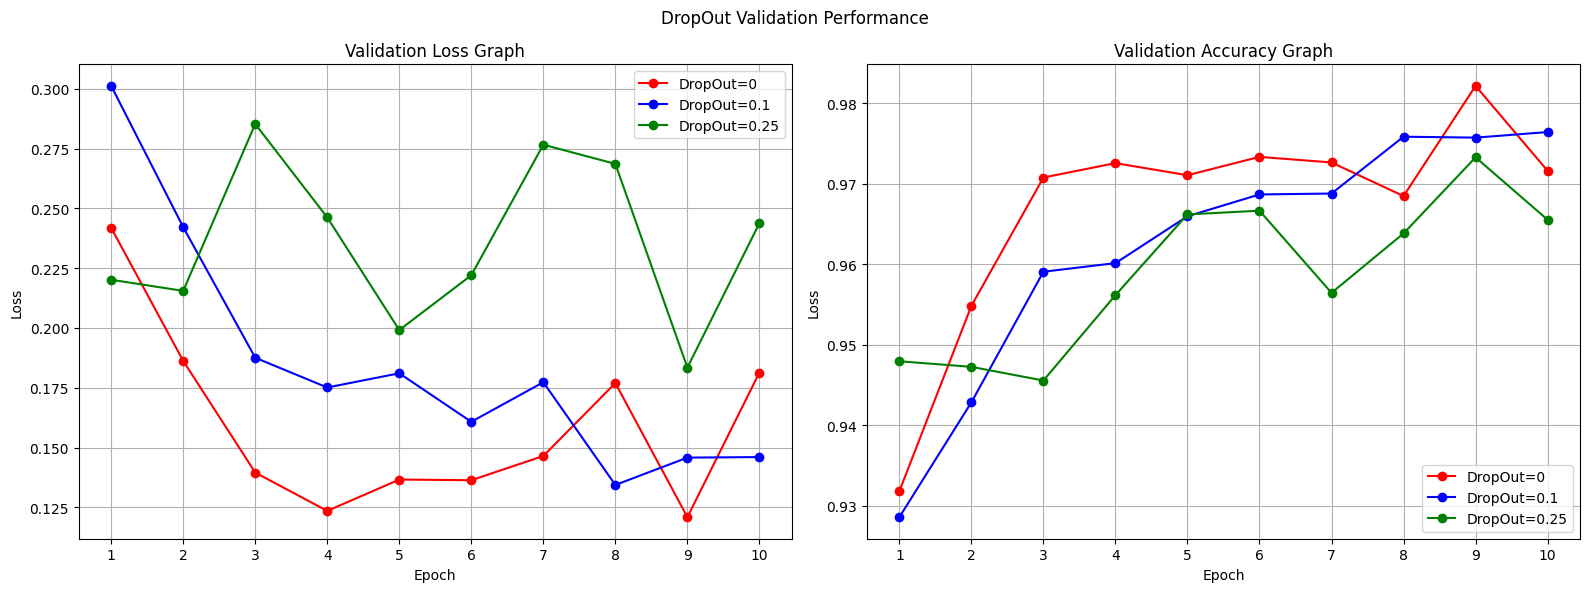

In [47]:
highdrop=np.loadtxt("drop025.dat")
lowdrop=np.loadtxt("drop0.dat")
loss_low=lowdrop[:,2]
loss_high=highdrop[:,2]
acc_low=lowdrop[:,3]
acc_high=highdrop[:,3]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Validation Loss Graph')
plt.xticks(ticks=range(1,n+1)) 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1,n+1),loss_high,"o-",label="DropOut=0",color="red")
plt.plot(range(1,n+1),val_loss,"o-",label="DropOut=0.1",color="blue")
plt.plot(range(1,n+1),loss_low,"o-",label="DropOut=0.25",color="green")
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.title("Validation Accuracy Graph")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(ticks=range(1,n+1)) 
plt.plot(range(1,n+1),acc_high,"o-",label="DropOut=0",color="red")
plt.plot(range(1,n+1),val_acc,"o-",label="DropOut=0.1",color="blue")
plt.plot(range(1,n+1),acc_low,"o-",label="DropOut=0.25",color="green")
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout(rect=[0,0,1,0.95])
plt.suptitle("DropOut Validation Performance")

### Test on random fruits:

Accuracy: 96.60%
Correct Guesses: 199/206
Mistakes: 7


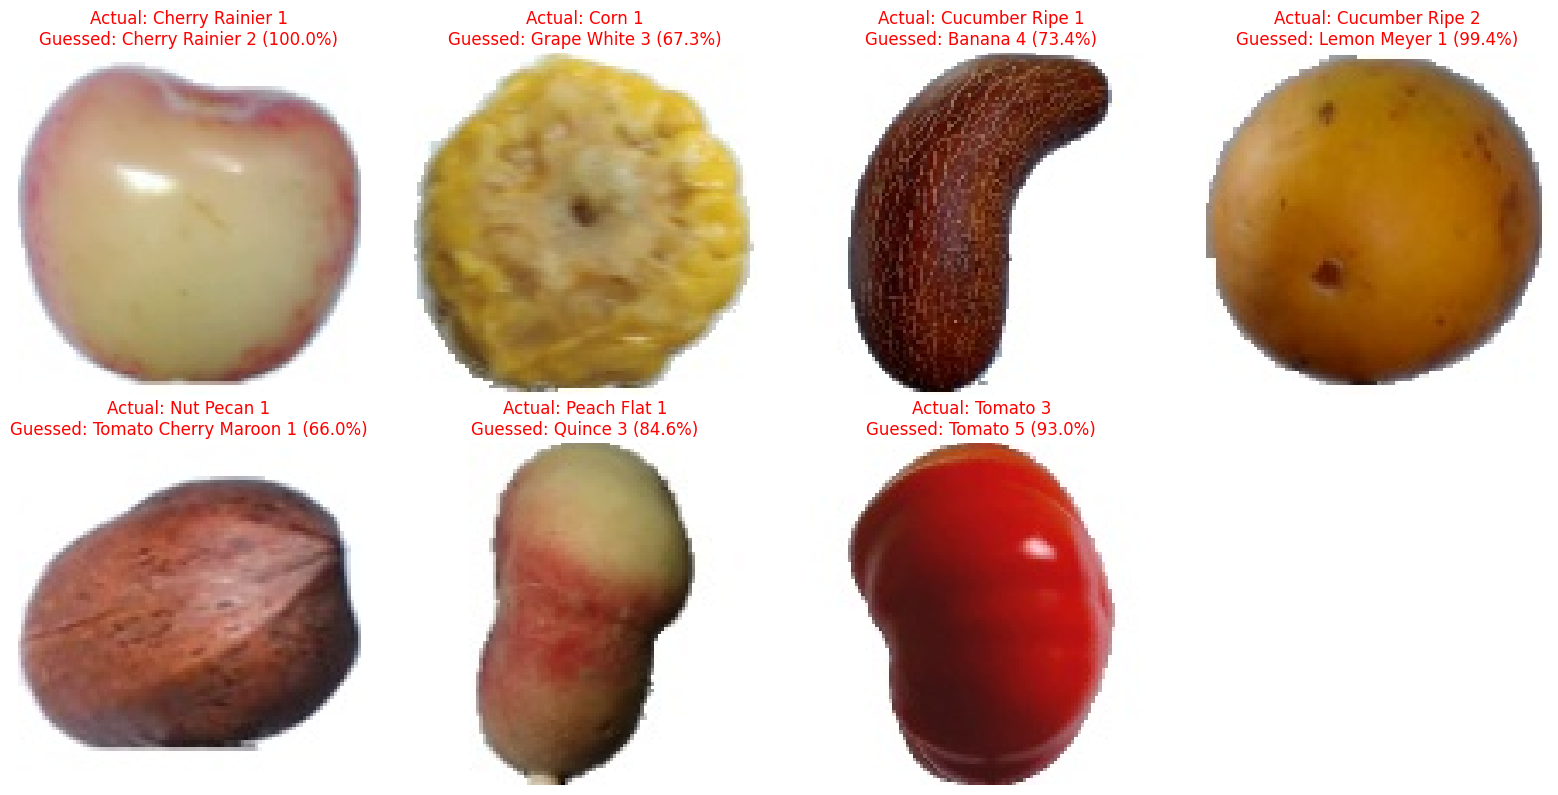

In [48]:
import random
def predict_image(image_path):
    image=tf.keras.utils.load_img(image_path, target_size=(100, 100))
    image_array=tf.keras.utils.img_to_array(image)
    image_batch=np.expand_dims(image_array, axis=0)
    scores=model.predict(image_batch, verbose=0)
    best_guess_index=np.argmax(scores[0])
    predicted_label=class_names[best_guess_index]
    confidence=100*np.max(scores[0])
    return predicted_label,confidence

folder="data/Test"
class_names=sorted(os.listdir(folder))
mistakes=[]
correct_guesses=0

for actual_label in class_names:
    image_folder=os.path.join(folder,actual_label)
    random_image_file=random.choice(os.listdir(image_folder))
    path_to_image=os.path.join(image_folder,random_image_file)
    
    predicted_label,confidence=predict_image(path_to_image)
    
    if predicted_label==actual_label:
        correct_guesses+=1
    else:
        mistakes.append({
            "path":path_to_image,
            "actual":actual_label,
            "guess":predicted_label,
            "confidence":confidence
        })

total_images=len(class_names)
accuracy=(correct_guesses/total_images)*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Correct Guesses: {correct_guesses}/{total_images}")
print(f"Mistakes: {len(mistakes)}")

if mistakes:
    num_mistakes=len(mistakes)
    num_cols=4
    num_rows=(num_mistakes+num_cols-1)//num_cols
    
    plt.figure(figsize=(16,4*num_rows))
    
    for i,mistake in enumerate(mistakes):
        plt.subplot(num_rows, num_cols, i+1)
        
        image=tf.keras.utils.load_img(mistake["path"])
        plt.imshow(image)
        plt.axis('off')
        
        plt.title(
            f"Actual: {mistake['actual']}\n"
            f"Guessed: {mistake['guess']} ({mistake['confidence']:.1f}%)",
            color='red'
        )
        
    plt.tight_layout()
    plt.show()
else: 
    print("\nThe model made no mistakes in this test")

### REPORT:

In [49]:
from sklearn.metrics import classification_report

ytrue=[]
ypred=[]

for image_batch,label_batch in test_dataset:
    ytrue.extend(np.argmax(label_batch,axis=1))
    preds=model.predict(image_batch,verbose=0)
    ypred.extend(np.argmax(preds,axis=1))

print("\nFinal Report:")
print(classification_report(ytrue,ypred,target_names=test_dataset.class_names))



Final Report:
                           precision    recall  f1-score   support

                 Apple 10       1.00      1.00      1.00       231
                 Apple 11       0.92      1.00      0.96       142
                 Apple 12       0.96      1.00      0.98       154
                 Apple 13       1.00      1.00      1.00       235
                 Apple 14       1.00      0.99      1.00       154
                 Apple 17       1.00      1.00      1.00       201
                 Apple 18       1.00      1.00      1.00       160
                 Apple 19       1.00      1.00      1.00       241
                  Apple 5       1.00      1.00      1.00       146
                  Apple 6       0.84      1.00      0.91       157
                  Apple 7       1.00      1.00      1.00       229
                  Apple 8       1.00      1.00      1.00       228
                  Apple 9       1.00      1.00      1.00       231
         Apple Braeburn 1       0.93      0.99

### CONFUSION MATRIX:

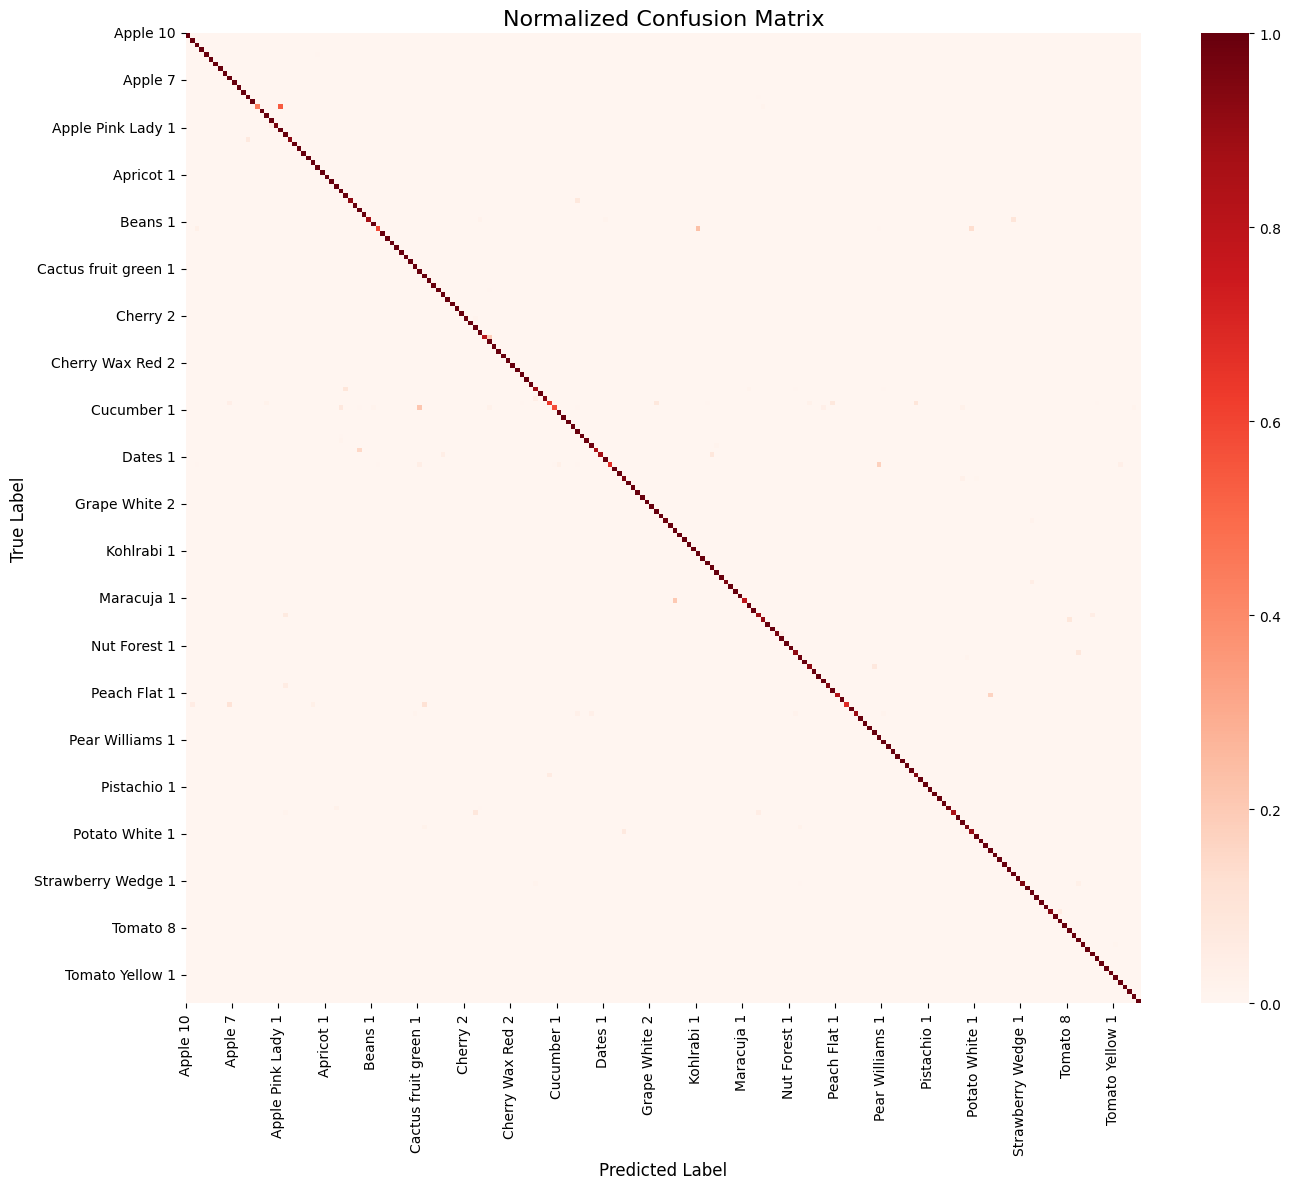

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytrue,ypred,normalize='true')
plt.figure(figsize=(14,12))
sns.heatmap(cm,annot=False,cmap='Reds')

plt.title("Normalized Confusion Matrix",fontsize=16)
plt.ylabel("True Label",fontsize=12)
plt.xlabel("Predicted Label",fontsize=12)

spacing=10  #show 1/10 classes every time
positions=[] #numeric position of the labels
labels=[]  # name of classes

for i,class_name in enumerate(class_names):
    if i%spacing==0:
        positions.append(i)
        labels.append(class_name)

plt.xticks(positions,labels,rotation=90)
plt.yticks(positions,labels)
plt.tight_layout()
plt.show()

### References